<a href="https://colab.research.google.com/github/Neeshi14/Task7/blob/main/1)Thyroidprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Work with pytorch
1) Create a Neural network for classification of Thyroid dataset.


2) create CNN for Mnist dataset.

**1) create the NN for classification of Thyroid dataset.**

The dataset are downloaded in the kaggle platform.In that the dataset name is "thyroid_cancer_risk_data.csv" are downloaded .

There are 17 features

Here’s a brief one-line explanation for each feature of dataset:

Patient_ID -> Unique identifier for each patient

Age -> Patient’s age in years

Gender -> Patient’s gender (Male/Female)

Country -> Patient’s country of residence

Ethnicity -> Patient’s ethnic background (Caucasian, Asian, etc)

Family_History -> Whether the patient has a family history of thyroid cance (Yes/No)

Radiation_Exposure -> Whether the patient has been exposed to radiation (Yes/No)

Iodine_Deficiency -> Whether the patient has iodine deficiency (Yes/No)

Smoking -> Whether the patient is a smoker (Yes/No)

Obesity -> Whether the patient is classified as obese (Yes/No)

Diabetes -> Whether the patient has diabetes (Yes/No)

TSH_Level -> Level of thyroid-stimulating hormone (TSH) in blood (mIU/L)

T3_Level -> Level of triiodothyronine (T3) hormone in blood (nmol/L)

T4_Level -> Level of thyroxine (T4) hormone in blood (nmol/L)

Nodule_Size -> Size of thyroid nodules (cm)

Thyroid_Cancer_Risk -> Assessed risk level (Low, Medium, High)

Diagnosis -> Final thyroid diagnosis (Benign, Malignant)

Import library

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

load the dataset

In [31]:
# load the dataset
df = pd.read_csv('/content/thyroid_cancer_risk_data.csv')
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [32]:
#Check for missing values
df.isnull().sum()
#Here are no missing value

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


In [33]:
df.duplicated().sum() # check the duplicated value

0

In [34]:
df.shape

(212691, 17)

In [35]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
Benign,163196
Malignant,49495


In [36]:
#Convert categorical values to lowercase & remove whitespace:
df['Gender'] = df['Gender'].str.lower().str.strip()
# Replace inconsistent categorical values:
df['Gender'] = df['Gender'].replace({'male': '0', 'female': '1'})
df['Gender']

,Gender
0,0
1,0
2,0
3,1
4,1
...,...
212686,1
212687,0
212688,1
212689,1


In [37]:
# Apply mapping to convert categorical values to numbers
df['Thyroid_Cancer_Risk'] = df['Thyroid_Cancer_Risk'].replace({'Low': 0, 'Medium': 1, 'High': 2})
df['Thyroid_Cancer_Risk']

<ipython-input-37-508245d4c9d3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Thyroid_Cancer_Risk'] = df['Thyroid_Cancer_Risk'].replace({'Low': 0, 'Medium': 1, 'High': 2})


,Thyroid_Cancer_Risk
0,0
1,0
2,0
3,1
4,2
...,...
212686,0
212687,1
212688,1
212689,1


In [38]:
binary_features = [ 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Obesity','Diabetes','Smoking']
 #Replacing 'Yes' and 'No' with 1 and 0 in binary_features columns
for feature in binary_features:
   df[feature] = df[feature].replace({'Yes': 1, 'No': 0})
df[binary_features] = df[binary_features].astype(int)
df[binary_features]

<ipython-input-38-845df587b18a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].replace({'Yes': 1, 'No': 0})


,Family_History,Radiation_Exposure,Iodine_Deficiency,Obesity,Diabetes,Smoking
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,0,0,0,0
...,...,...,...,...,...,...
212686,0,0,0,1,0,0
212687,0,0,0,1,0,0
212688,0,0,0,0,1,0
212689,0,0,0,0,1,0


In [39]:
df['Diagnosis'] = df['Diagnosis'].replace({'Benign': 0, 'Malignant': 1})
df['Diagnosis']

<ipython-input-39-a717b126f46c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'Benign': 0, 'Malignant': 1})


,Diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
212686,0
212687,0
212688,0
212689,0


In [40]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,0,Russia,Caucasian,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0,0
1,2,29,0,Germany,Hispanic,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0,0
2,3,86,0,Nigeria,Caucasian,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0,0
3,4,75,1,India,Asian,0,0,0,0,0,0,4.10,2.62,11.04,2.46,1,0
4,5,35,1,Germany,African,1,1,0,0,0,0,9.10,2.11,10.71,2.11,2,0


In [41]:
country_counts = df['Country'].value_counts()
num_unique_countries = len(country_counts)
print(num_unique_countries)
print(f"Countries and their counts:\n{country_counts}")

Ethnicity_counts = df['Ethnicity'].value_counts()
num_unique_Ethnicity = len(country_counts)
print(num_unique_Ethnicity)
print(f"Countries and their counts:\n{Ethnicity_counts}")

10
Countries and their counts:
Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64
10
Countries and their counts:
Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64


In [42]:
df['Country'] = df['Country'].replace({'India':1,'China':2,'Nigeria':3,'Brazil':4,'Russia':5 , 'Japan':6 , 'South Korea':7 , 'UK':8, 'USA':9,'Germany':10})
df['Ethnicity'] = df['Ethnicity'].replace({'Caucasian':1,'Asian':2,'African':3,'Hispanic':4,'Middle Eastern':5})

<ipython-input-42-3d726d4d6fa7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country'] = df['Country'].replace({'India':1,'China':2,'Nigeria':3,'Brazil':4,'Russia':5 , 'Japan':6 , 'South Korea':7 , 'UK':8, 'USA':9,'Germany':10})
<ipython-input-42-3d726d4d6fa7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ethnicity'] = df['Ethnicity'].replace({'Caucasian':1,'Asian':2,'African':3,'Hispanic':4,'Middle Eastern':5})


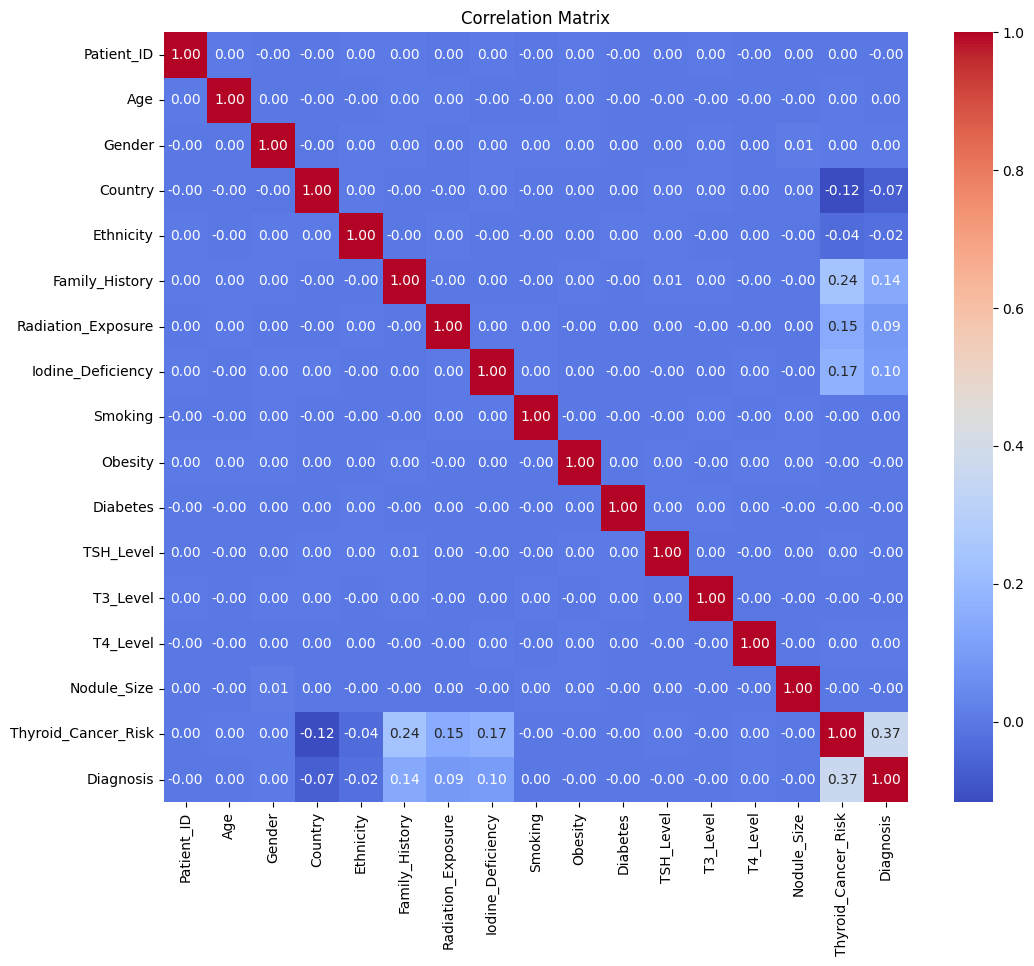

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # fmt=".2f" controls decimal places
plt.title('Correlation Matrix')
plt.show()
# Display the plot


In [44]:
X=df.drop(columns=['Diagnosis','Patient_ID','Ethnicity'])
Y=df['Diagnosis']

In [45]:
X = X.apply(pd.to_numeric)

X=torch.tensor(X.values,dtype=torch.float32)
Y=torch.tensor(Y.values,dtype=torch.long)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [47]:
X_train.shape, Y_train.shape,X_test.shape,Y_test.shape

(torch.Size([170152, 14]),
 torch.Size([170152]),
 torch.Size([42539, 14]),
 torch.Size([42539]))

In [48]:
#NN Model creation
class Thyroid_Cancer_Risk(nn.Module):
    def __init__(self):
        super(Thyroid_Cancer_Risk, self).__init__()
        self.fc1 = nn.Linear(14, 64) # Input layer 14 feature
        self.fc2 = nn.Linear(64, 32) # hidden layer with 64 neurons
        self.fc3 = nn.Linear(32, 2)  # output layer with 32 neurons , 1 for binary classification

    def forward(self,x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)   # for output layer
      return x


model = Thyroid_Cancer_Risk()
print(model)


Thyroid_Cancer_Risk(
  (fc1): Linear(in_features=14, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)


In [49]:
optimizer = optim.Adam(model.parameters(), lr=0.001)   #Parameters()->learnable parameter(likes:Weights and biases, learning rate=0.001)
criterion = nn.CrossEntropyLoss()

In [50]:
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [51]:
# model training
epochs = 3  # Number of training epochs

for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()  # Reset gradients
        output = model(data)  # Forward pass
        loss = criterion(output, target)  # Calculate loss
        loss.backward()  # Backpropagate gradients
        optimizer.step()  # Update model parameters

In [52]:
# for testing
with torch.no_grad():
    prediction = model(X_test)
    predicted = torch.argmax(prediction, 1)
    accuracy = accuracy_score(Y_test, predicted)
    print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.87%


In [53]:
# classsification report
from sklearn.metrics import classification_report
report=classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32679
           1       0.70      0.45      0.55      9860

    accuracy                           0.83     42539
   macro avg       0.78      0.70      0.72     42539
weighted avg       0.82      0.83      0.81     42539



In [54]:
predicted_np = predicted.numpy()
Y_test_np = Y_test.numpy()

In [55]:
results_df = pd.DataFrame({'Actual': Y_test_np, 'Predicted': predicted_np})
print(results_df)

       Actual  Predicted
0           0          0
1           0          0
2           1          0
3           0          0
4           0          1
...       ...        ...
42534       1          0
42535       0          1
42536       0          0
42537       0          0
42538       1          1

[42539 rows x 2 columns]


In [56]:
# Create the DataFrame
testing_df = pd.DataFrame(X_test, columns=[f"Feature_{i}" for i in range(X_test.shape[1])])  # Input Features
testing_df['Predicted_Output'] = predicted_np  # Predicted output by AI
testing_df['Actual_Output'] = Y_test  # Actual Outputs

# Rename the columns in a single line
testing_df = testing_df.rename(columns={f"Feature_{i}": new_name for i, new_name in enumerate(['Age', 'Gender', 'Country', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking','Obesity','Diabetes','TSH_Level','T3_Level','T4_Level','Nodule_Size','Thyroid_Cancer_Risk','Diagnosis'])})
# Display the DataFrame
testing_df.head()

,Age,Gender,Country,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Predicted_Output,Actual_Output
0,43.0,1.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,7.33,3.36,10.40,3.06,0.0,0,0
1,16.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,3.57,0.66,6.79,1.29,0.0,0,0
2,81.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,4.31,2.52,11.96,0.13,0.0,0,1
3,67.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,9.21,0.90,6.88,3.16,0.0,0,0
4,72.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.23,3.15,11.85,1.64,2.0,1,0
